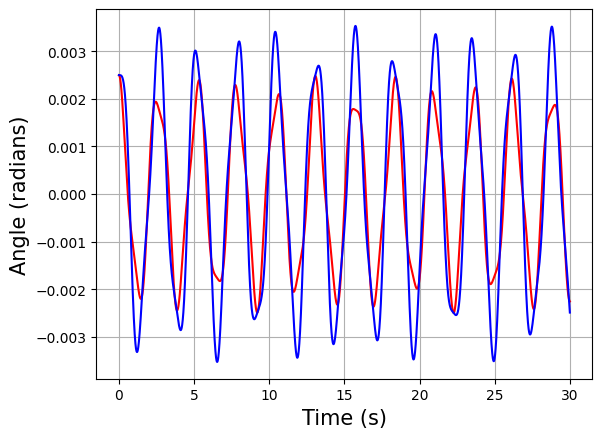

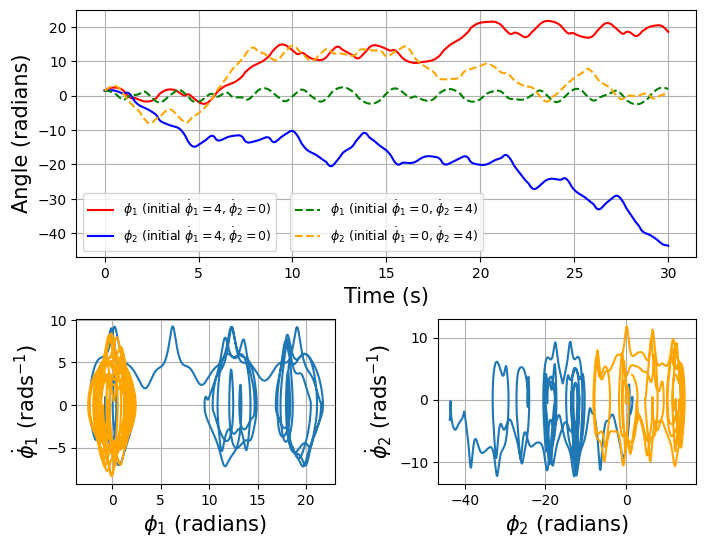

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.gridspec as gridspec


def pendulumEq(vec):
    """
    Equations of motion for the double pendulum:
    dphi_1/dt = phidot_1 - angular velocity of 1st pendulum
    dphi_2/dt = phidot_2 - angular velocity of 2nd pendulum
    dphidot_1/dt = ((w**2)sin(phi_2)cos(lambda)-(phidot_1**2)sin(lambda)cos(lambda)-(phidot_2**2)sin(lambda))/(2-(np.cos(lambda1)**2)) - angular acceleration of 1st pendulum
    dphidot_2/dt = -phiDotDot1*np.cos(lambda1)+(phiDot1**2)*np.sin(lambda1)-(omega**2)*np.sin(phi2) - angular acceleration of 2nd pendulum
    """
    phi1, phiDot1, phi2, phiDot2 = vec
    delta1 = phi1 - phi2
    phiDotDot1 = ((omega2)*np.sin(phi2)*np.cos(delta1)-(phiDot1**2)*np.sin(delta1)*np.cos(delta1)-(phiDot2**2)*np.sin(delta1)-2*(omega2)*np.sin(phi1))/(2-(np.cos(delta1)**2))
    phiDotDot2 = -phiDotDot1*np.cos(delta1)+(phiDot1**2)*np.sin(delta1)-(omega2)*np.sin(phi2)

    return np.array([phiDot1, phiDotDot1, phiDot2, phiDotDot2])

def RungeKuttaCoupled(vec, dt):
  """
  Uses the Runge-Kutta method to solve the double pendulum equations of motion
  """

  k1 = pendulumEq(vec)
  k2 = pendulumEq(vec + dt/2 * k1)
  k3 = pendulumEq(vec + dt/2 * k2)
  k4 = pendulumEq(vec + dt * k3)

  return vec + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

def getSolutions(vec):
  """
  Gets the solutions of the differential equations.
  """

  tList = []
  phiList1 = []
  phiList2 = []
  phiDotList1 = []
  phiDotList2 = []

  t = t0

  # implement Runge-Kutta method
  while t < tEnd:

    tList.append(t)
    phiList1.append(vec[0])
    phiDotList1.append(vec[1])
    phiList2.append(vec[2])
    phiDotList2.append(vec[3])

    vec = RungeKuttaCoupled(vec, dt)
    t = t+dt

  return tList,phiList1,phiDotList1,phiList2,phiDotList2

# initial conditions
g = 9.81
l = 1
phiInit1 = 0.0025 # small angle
phiInit2 = 0.0025 # small angle
phiDotInit1 = 0 # small angle
phiDotInit2 = 0 # small angle
omega2 = g/l
t0 = 0
dt = 0.001 # time step
tEnd = 30

vec = np.array([phiInit1, phiDotInit1, phiInit2, phiDotInit2])
tList,phiList1,phiDotList1,phiList2,phiDotList2 = getSolutions(vec)

# big angle
phiInit1 = 1.5
phiInit2 = 1.5
phiDotInit1 = 4
phiDotInit2 = 0

vec1 = np.array([phiInit1, phiDotInit1, phiInit2, phiDotInit2])
tList1,phiList11,phiDotList11,phiList21,phiDotList21 = getSolutions(vec1)
phiDotInit1 = 0
phiDotInit2 = 4
vec2 = np.array([phiInit1, phiDotInit1, phiInit2, phiDotInit2])
tList2,phiList12,phiDotList12,phiList22,phiDotList22 = getSolutions(vec2)

# Plot results

# small angle double pendulum
plt.figure()
plt.plot(tList, phiList1, label = r"$\dot\phi_1$",  color="red")
plt.plot(tList, phiList2, label = r"$\dot\phi_2$", color="blue")
plt.xlabel("Time (s)",fontsize=15)
plt.ylabel("Angle (radians)",fontsize=15)
plt.grid()

plt.show()
# plt.savefig("pendulum_motion.pdf")
# files.download("pendulum_motion.pdf")

# big angle double pendulum
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1])
plt.figure(figsize=(8,6))
ax = plt.subplot(gs[0, :])

line1, = plt.plot(tList1, phiList11,  color="red")
line2, = plt.plot(tList1, phiList21, color="blue")
line3, = plt.plot(tList2, phiList12, color="green", linestyle="dashed")
line4, = plt.plot(tList2, phiList22, color="orange", linestyle="dashed")
plt.xlabel("Time (s)",fontsize=15)
plt.ylabel("Angle (radians)",fontsize=15)
plt.grid()

legend1 = ax.legend(
    [line1, line2],
    [r"$\phi_1$ (initial $\dot\phi_1 = 4, \dot\phi_2 = 0$)", r"$\phi_2$ (initial $\dot\phi_1 = 4, \dot\phi_2 = 0$)"],
    loc="best",
    fontsize=9
)

legend2 = ax.legend(
    [line3, line4],
    [r"$\phi_1$ (initial $\dot\phi_1 = 0, \dot\phi_2 = 4$)",
     r"$\phi_2$ (initial $\dot\phi_1 = 0, \dot\phi_2 = 4$)"],
    loc="lower center",
    fontsize=9
)

ax.add_artist(legend1)

ax = plt.subplot(gs[1, 0])

plt.plot(phiList11, phiDotList11)
plt.plot(phiList12, phiDotList12, color="orange")
plt.xlabel(r"$\phi_1$ (radians) ",fontsize=15)
plt.ylabel(r"$\dot{\phi}_1$ (rads$^{-1}$)",fontsize=15)
plt.grid()

ax = plt.subplot(gs[1, 1])

plt.plot(phiList21, phiDotList21)
plt.plot(phiList22, phiDotList22, color="orange")
plt.xlabel(r"$\phi_2$ (radians)", fontsize=15)
plt.ylabel(r"$\dot{\phi}_2$ (rads$^{-1}$)",fontsize=15)
plt.grid()

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(top=0.9,hspace=0.3)

plt.show()
# plt.savefig("pendulum_motion_big_angle2.pdf")
# files.download("pendulum_motion_big_angle2.pdf")
